## Microsoft Stock Price Prediction 2010-2022

#### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import pandas_datareader as web

import seaborn as sns

import matplotlib.pyplot as plt

#### Import Data

In [2]:
df = web.DataReader('MSFT', data_source='yahoo', start='2010-01-01', end='2022-12-09')

In [3]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,31.100000,30.590000,30.620001,30.950001,38409100.0,23.683069
2010-01-05,31.100000,30.639999,30.850000,30.959999,49749600.0,23.690720
2010-01-06,31.080000,30.520000,30.879999,30.770000,58182400.0,23.545334
2010-01-07,30.700001,30.190001,30.629999,30.450001,50559700.0,23.300468
2010-01-08,30.879999,30.240000,30.280001,30.660000,51197400.0,23.461161


In [4]:
df.sample(5)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-05-09,30.830000,30.100000,30.190001,30.760000,50309300.0,24.828638
2020-05-15,187.059998,177.000000,179.059998,183.160004,46610400.0,178.551300
2015-07-13,45.619999,44.950001,44.980000,45.540001,28178300.0,40.289639
2014-09-02,45.459999,44.849998,45.430000,45.090000,22976800.0,39.107227
2018-02-06,91.480003,85.250000,86.889999,91.330002,67998600.0,86.006828


In [5]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,31.100000,30.590000,30.620001,30.950001,38409100.0,23.683069
2010-01-05,31.100000,30.639999,30.850000,30.959999,49749600.0,23.690720
2010-01-06,31.080000,30.520000,30.879999,30.770000,58182400.0,23.545334
2010-01-07,30.700001,30.190001,30.629999,30.450001,50559700.0,23.300468
2010-01-08,30.879999,30.240000,30.280001,30.660000,51197400.0,23.461161


#### EDA - Exploratory Data Analysis

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3258 entries, 2010-01-04 to 2022-12-09
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       3258 non-null   float64
 1   Low        3258 non-null   float64
 2   Open       3258 non-null   float64
 3   Close      3258 non-null   float64
 4   Volume     3258 non-null   float64
 5   Adj Close  3258 non-null   float64
dtypes: float64(6)
memory usage: 178.2 KB


In [7]:
df.shape

(3258, 6)

In [8]:
df.isnull().sum()

High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [9]:
df.describe()

,High,Low,Open,Close,Volume,Adj Close
count,3258.000000,3258.000000,3258.000000,3258.000000,3.258000e+03,3258.000000
mean,100.454985,98.440442,99.470691,99.496983,3.804161e+07,94.690682
std,88.874731,86.908640,87.925893,87.936173,2.148453e+07,88.931219
min,23.320000,22.730000,23.090000,23.010000,7.425600e+06,17.769503
25%,32.000000,31.540001,31.765000,31.792500,2.390122e+07,25.900165
50%,55.890001,54.985001,55.379999,55.395000,3.233470e+07,49.924141
75%,139.730000,136.959999,138.887497,138.407501,4.682415e+07,133.880955
max,349.670013,342.200012,344.619995,343.109985,3.193179e+08,339.924835


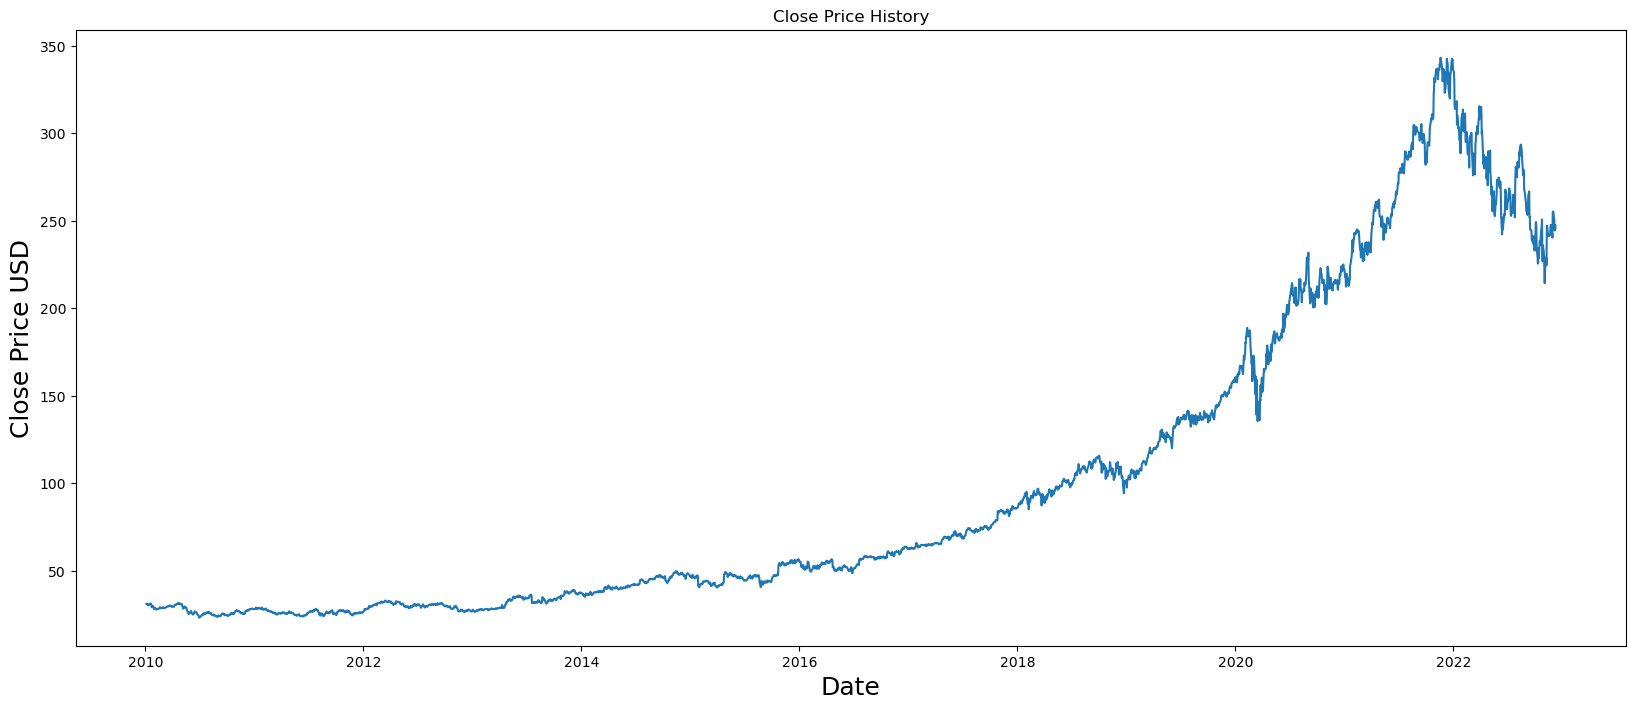

In [10]:
plt.figure(figsize=(20,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD', fontsize=18)
plt.show()

#### Prediciton and selecting the Algorithm

In [11]:
def regression_funct(x,y):
    from sklearn.linear_model import LinearRegression
    from sklearn.linear_model import Ridge,Lasso
    from sklearn.linear_model import ElasticNet
    from sklearn.tree import ExtraTreeRegressor
    from sklearn.ensemble import GradientBoostingRegressor
    from sklearn.neighbors import KNeighborsRegressor
    
    from sklearn.model_selection import train_test_split

    from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
    
    
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

    L=LinearRegression()
    R=Ridge()
    Lass=Lasso()
    E=ElasticNet()
    ExTree=ExtraTreeRegressor()
    GBR=GradientBoostingRegressor()
    KN=KNeighborsRegressor()
    
    algos=[L,R,Lass,E,ExTree,GBR,KN]
    algo_names=['LinearRegression','Ridge','Lasso','ElasticNet','ExtraTreeRegressor','GradientBoostingRegressor','KNeighborsRegressor']
    r_squared=[]
    rmse=[]
    mae=[]
    
    result=pd.DataFrame(columns=['R_Squared','RMSE','MAE'],index=algo_names)
    
    for item in algos:
        item.fit(x_train,y_train)
        item.predict(x_test)
        r_squared.append(r2_score(y_test,item.predict(x_test)))
        rmse.append((mean_squared_error(y_test,item.predict(x_test)))**.5)
        mae.append(mean_absolute_error(y_test,item.predict(x_test)))
        
    result.R_Squared=r_squared
    result.RMSE=rmse
    result.MAE=mae
        
    return result.sort_values('R_Squared',ascending=False)

In [12]:
x = df.drop('Close', axis = 1)
y = df[['Close']]

In [13]:
x.shape, y.shape

((3258, 5), (3258, 1))

In [14]:
regression_funct(x,y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.352e+03, tolerance: 2.021e+03
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.338e+03, tolerance: 2.021e+03
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,R_Squared,RMSE,MAE
LinearRegression,0.999962,0.535148,0.360961
Ridge,0.999962,0.535154,0.360972
GradientBoostingRegressor,0.999929,0.732600,0.471803
ElasticNet,0.999832,1.128367,0.558849
ExtraTreeRegressor,0.999828,1.143771,0.487132
Lasso,0.999817,1.178059,0.583527
KNeighborsRegressor,-0.052090,89.355551,66.922300


##### New dataframe with 'Close' column

In [15]:
data = df[['Close']]

In [16]:
data.shape

(3258, 1)

In [17]:
data.head()

,Close
Date,
2010-01-04,30.950001
2010-01-05,30.959999
2010-01-06,30.770000
2010-01-07,30.450001
2010-01-08,30.660000


In [18]:
#Convert the dataframe to a numpy array
dataset = data.values



#### Scale data

In [19]:
from sklearn.preprocessing import MinMaxScaler

In [20]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

In [21]:
scaled_data

array([[0.02480475],
       [0.02483599],
       [0.02424243],
       ...,
       [0.69153391],
       [0.7009997 ],
       [0.69481415]])

#### Create the training data set

In [22]:
scaled_data.shape

(3258, 1)

In [23]:
train_number = scaled_data.shape[0]*0.8

In [24]:
train_number

2606.4

In [25]:
train_data = scaled_data[0:2607, :]

In [26]:
#split data into x_train and y_train datasets
x_train = []
y_train = []

for i in range (60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

[array([0.02480475, 0.02483599, 0.02424243, 0.02324274, 0.02389878,
       0.02268041, 0.02205561, 0.02293034, 0.02483599, 0.02452359,
       0.02527335, 0.0236801 , 0.02186817, 0.01858794, 0.01971259,
       0.02027491, 0.020806  , 0.01921275, 0.0161512 , 0.01686973,
       0.01702593, 0.01755701, 0.01508904, 0.01565136, 0.01471415,
       0.01562012, 0.01555764, 0.01596376, 0.0153702 , 0.01668229,
       0.01743205, 0.01861918, 0.01799438, 0.01786941, 0.01661981,
       0.01755701, 0.01746329, 0.01768197, 0.01877538, 0.01702593,
       0.01702593, 0.01755701, 0.01743205, 0.01755701, 0.0180881 ,
       0.01861918, 0.01927523, 0.01955639, 0.01961887, 0.01986879,
       0.02068103, 0.02061856, 0.02055608, 0.02058732, 0.02146204,
       0.02074352, 0.02186817, 0.02077476, 0.02055608, 0.0211184 ])]
[0.019618872160330314]

[array([0.02480475, 0.02483599, 0.02424243, 0.02324274, 0.02389878,
       0.02268041, 0.02205561, 0.02293034, 0.02483599, 0.02452359,
       0.02527335, 0.0236801 , 0.0

In [27]:
# Convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [28]:
# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [29]:
x_train.shape

(2547, 60, 1)

In [30]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [31]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences = True,input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

In [32]:
#Compile model
model.compile(optimizer='adam', loss='mean_squared_error')

In [33]:
#Train model
model.fit(x_train, y_train, batch_size=1, epochs=1)


2547/2547 [==============================] - 119s 44ms/step - loss: 2.7632e-04


In [34]:
# Create test data
test_data = scaled_data[2607 -60: , :]
# Create x
x_test = []
y_test = dataset[2607:,:]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60: i, 0])

In [35]:
x_test = np.array(x_test)

In [36]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

In [37]:
#Get models predicted price
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

21/21 [==============================] - 3s 35ms/step


In [38]:
#Get RMSE
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

16.21741207843552

C:\Users\a03121\AppData\Local\Temp\ipykernel_25928\3629041768.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


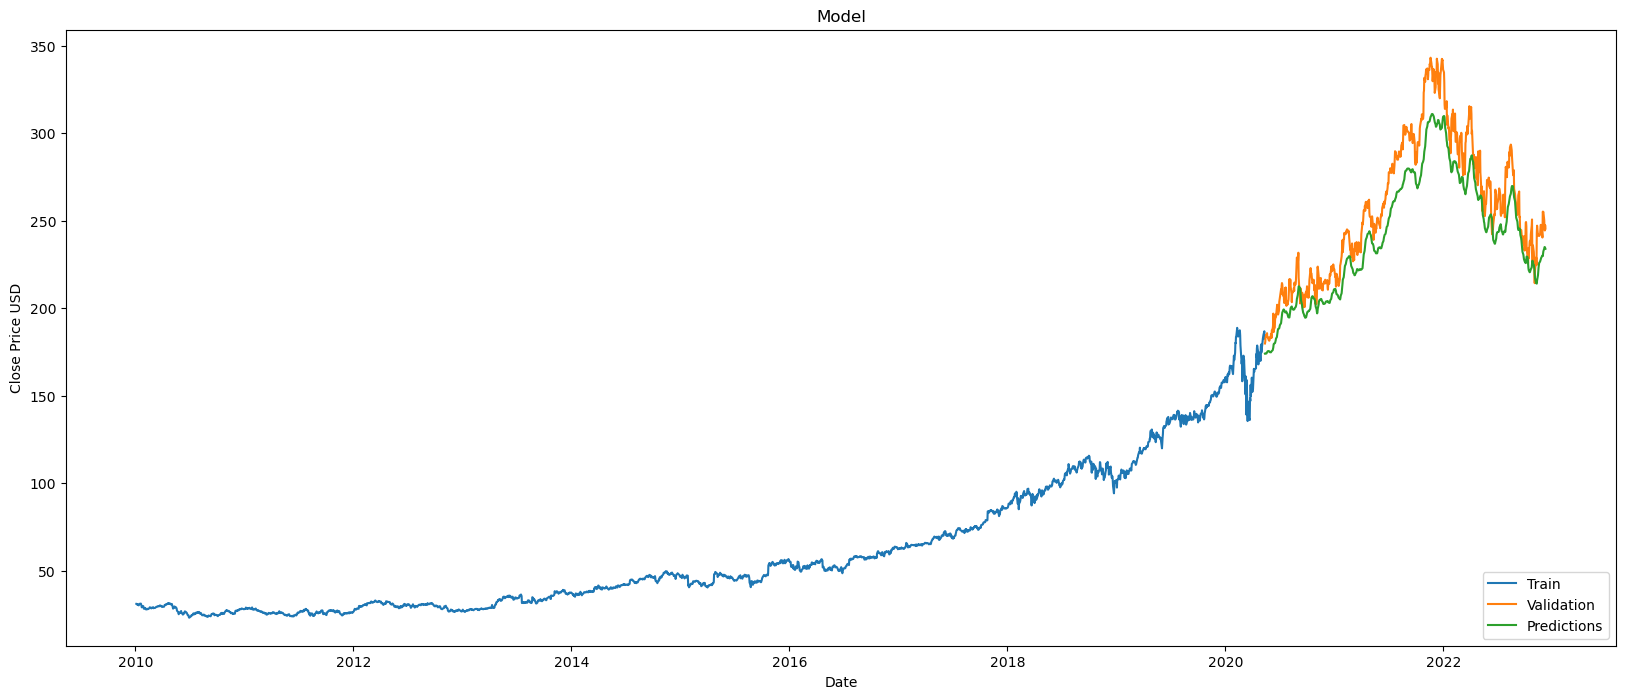

In [39]:
# plot data
train = data[:2607]
valid = data[2607:]
valid['Predictions'] = predictions

# Visualization

plt.figure(figsize=(20,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD')
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train', 'Validation', 'Predictions'], loc='lower right')
plt.show()

In [40]:
#show valid and predicted prices
valid

,Close,Predictions
Date,,
2020-05-13,179.750000,174.014526
2020-05-14,180.529999,174.096573
2020-05-15,183.160004,173.973175
2020-05-18,184.910004,174.048035
2020-05-19,183.630005,174.385696
...,...,...
2022-12-05,250.199997,234.033829
2022-12-06,245.119995,234.908630
2022-12-07,244.369995,234.827927
